In [71]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

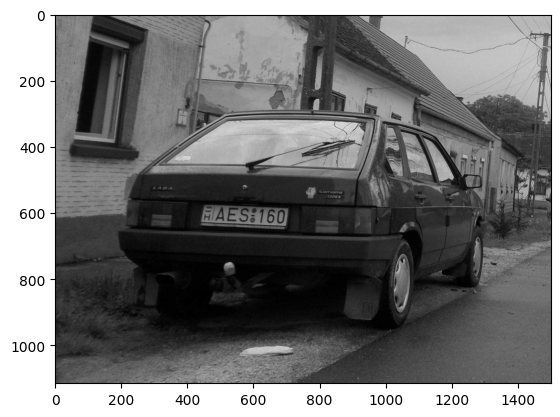

In [72]:
image = cv2.imread("data/car.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap="gray")

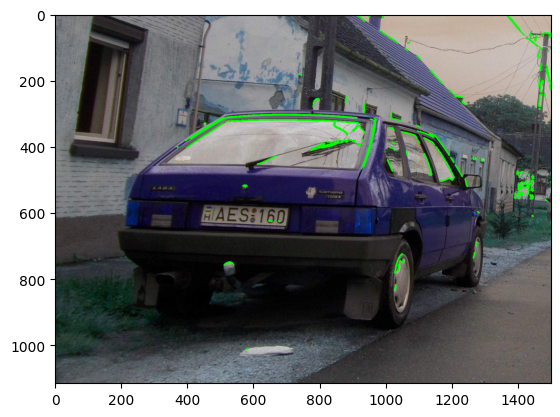

In [73]:
edges = cv2.Canny(gray, threshold1=400, threshold2=600)
contours, new = cv2.findContours(edges.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
img1 = image.copy()
cv2.drawContours(img1, contours, -1, (0, 255, 0), 3)
plt.imshow(img1)

[[[1149  400]]

 [[1204  493]]

 [[1163  505]]

 [[1204  492]]

 [[1152  403]]]


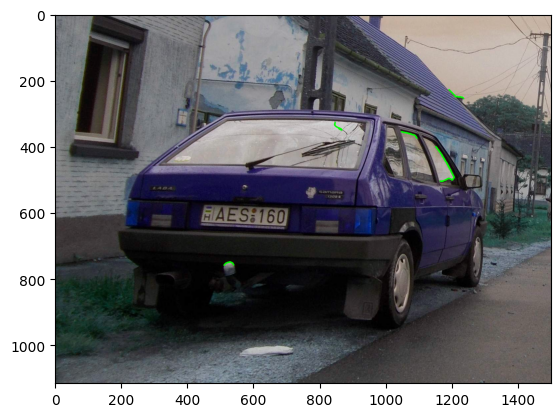

In [74]:
# filter for contours with 4 corners
filtered_contours = []
for contour in contours:
    if len(cv2.approxPolyDP(contour, 0.05 * cv2.arcLength(contour, True), True)) == 4:
        filtered_contours.append(contour)

# sort contours by arc length, keep largest 30
arc = lambda cnt: cv2.arcLength(cnt, False)
filtered_contours = sorted(filtered_contours, key=arc, reverse=True)[:5]

img2 = image.copy()
print(cv2.approxPolyDP(filtered_contours[0], 0.05 * cv2.arcLength(filtered_contours[0], True), False))
cv2.drawContours(img2, filtered_contours, -1, (0, 255, 0), 3)
plt.imshow(img2)

In [75]:
def perspective_transform(image, pts):
    # Define the rectangle coordinates
    rect = np.array(pts, dtype="float32")

    # Create a rectangle with a fixed aspect ratio
    width = 520
    height = 110
    dst = np.array([[0, 0], [width, 0], [width, height], [0, height]], dtype="float32")

    # Compute the perspective transform matrix and apply it
    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (width, height))

    return warped

True

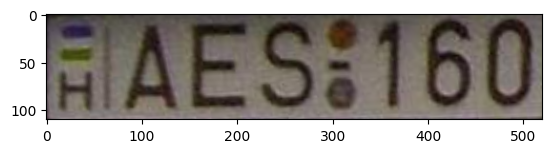

In [76]:
box = [(450, 575), (700, 590), (695, 640), (440, 627)]
result = perspective_transform(image, box)
plt.imshow(result)

# save image
cv2.imwrite("cropped.jpg", result)